# <center>Tarea 5<center>
# <center>Para entregar el 30 de noviembre<center>

## 1. Este ejercicio es sobre word embeddings con el modelo neuronal de lenguaje que vimos según la propuesta de Mikolov et al. Puedes entregar la respuesta en un PDF anexo si gustas.

Considera el modelo skip-gram de `word2vec`, donde la predicción de la palabra $w_j$ dada cierta palabra pivote (input) $w_i$ se calcula usando softmax:
$$
\hat{y}_j = P(w_j|w_i) = \frac{\exp(\mathbf{u}_{w_j}'\mathbf{v}_{w_i})}{\sum_{v=1}^V \exp(\mathbf{u}_{w_v}' \mathbf{v}_{w_i})}
$$

En esta expresión, $\mathbf{v}_w$ y $\mathbf{u}_w$ son dos representaciones vectoriales de una palabra $w$, dadas por los pesos $\text{input}\rightarrow \text{hidden}$ $\mathbf{W}_{V\times N}$ y $\text{hidden}\rightarrow \text{output}$ $\mathbf{U}_{N\times V}$, respectívamente. $V$ es el tamaño del vocabulario y $N$ representa el tamaño del embedding.

Suponiendo que los parámetros (embeddings) se obtienen minimizando cross-entropy:
$$
L(\mathbf{y},\hat{\mathbf{y}})=-\sum_{v\in V} y_v \log(\hat{y}_v),
$$
donde $\mathbf{y}$ es un vector 'one-hot encoding' y $\hat{\mathbf{y}}$ son las predicciones usando softmax.

### a) Muestra que el gradiente respecto a $\mathbf{v}_{w_i}$ representa el error de predicción (pesado) de la capa de salida, es decir:

$$ 
        \frac{\partial L}{\partial \mathbf{v}_{w_i}} = \mathbf{U}(\hat{\mathbf{y}}-\mathbf{y}),
$$
### donde $\mathbf{U}=(\mathbf{u}_1,\mathbf{u}_2,\ldots,\mathbf{u}_V)$ es la matriz de todos los vectores de salida. 
    
### b) Muestra que el gradiente de los vectores de salida $\mathbf{u}_{w_t}$'s (incluyendo $\mathbf{u}_{w_j}$) representa (nuevamente) el error de predicción con diferente peso:
$$ 
        \frac{\partial L}{\partial \mathbf{U}} = \mathbf{v}_{w_i}(\hat{\mathbf{y}}-\mathbf{y})',
$$

### c) Repite los dos incisos anteriores pero ahora considerando que usas la función de costo con muestreo negativo, es decir: 
$$
    L(\mathbf{v}_{w_i}, \mathbf{u}_{w_j})=-\log(\sigma(\mathbf{u}_{w_j}'\mathbf{v}_{w_i}))- \sum_{k=1}^K \log(\sigma(-\mathbf{u}_{w_k}'\mathbf{v}_{w_i})),
$$
### con $\sigma(\cdot)$ la función sigmoide. (Observa que la expresión anterior es la función de costo para SGNS de Mikolov que vimos en clase, pero con signo negativo, ya que queremos minimizarla)

### d) Explica porqué ésta función de costo es mucho más eficiente que usar la función softmax con Cross-Entropy.

# Respuesta:

- Tarea5_victor_gomez_P1.pdf

## 2. Considera el corpus `hispablogs.zip` (Rangel et al., 2017. https://arxiv.org/abs/1705.10754), que contiene una recopilación de blogs para los países de habla hispana Argentina, Chile, España, México y Perú. Puedes usar el siguiente código para leer los archivos train y test:

## puedes usar éste código para crear una bolsa de palabras

### a) Representa con una nube de palabras, las palabras más frecuentes usadas en cada país.

# Respuesta:

- El corpus de entrenamiento y prueba fue pre procesado, se puso en minúsculas, se quitaron signos de puntuación, números, stopwords y se obtuvieron las raíces de las palabras. Este mismo corpus pre procesado fue utilizado para los modelos basados en SVM.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ubicacion de la carpeta actual
CurrentPath = '/content/drive/My Drive/Colab Notebooks/Tarea 5-20201123/Tarea5_victor_gomez/'

In [ ]:
# tu respuesta aquí
import pandas as pd

#lee los datos
#Corpus pre procesados
PrCorpusTr=pd.read_csv(CurrentPath+'Tarea5_victor_gomez_PrCorpusTr.csv',index_col=0)
PrCorpusTe=pd.read_csv(CurrentPath+'Tarea5_victor_gomez_PrCorpusTe.csv',index_col=0)

CorpusTr_pros=PrCorpusTr.Corpus.values
CorpusTe_pros=PrCorpusTe.Corpus.values

tr_y=PrCorpusTr.cl.values
te_y=PrCorpusTe.cl.values

# código para nube de palabras con corpus pre procesado
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from ipywidgets import interact

#funcion para hacer la nube de las 50 palabras mas frecuentes
def WordCloudImg(Corpus,name,maxword=50):
    
    #junta todos los textos
    prep = " ".join(review for review in Corpus)
    my_stopwords=set(STOPWORDS)
    my_stopwords.update(['argentina','chile','espana','mexico','peru'])
    cloudtxt=WordCloud(background_color='white',stopwords=my_stopwords, max_words=maxword).generate(prep)
    plt.figure(figsize=(10,10))
    plt.imshow(cloudtxt,interpolation='bilinear')
    plt.title('50 Palabras más frecuentes en: '+name)
    plt.axis('off')
    plt.show()
    cloudtxt.to_file(CurrentPath+name+".png")

def plotimg(x): 
    if x=='Argentina':
        cl=0
    elif x=='Chile':
        cl=1
    elif x=='España':
        cl=2
    elif x=='México':
        cl=3
    elif x=='Perú':
        cl=4

    filtered=PrCorpusTr[PrCorpusTr.cl==cl]    
    Corpus=filtered['Corpus'].values #textos
    WordCloudImg(Corpus,x)

interact(plotimg,x=['Argentina', 'Chile', 'España', 'México', 'Perú']) #tarda un poco...

interactive(children=(Dropdown(description='x', options=('Argentina', 'Chile', 'España', 'México', 'Perú'), va…

<function __main__.plotimg>

### b) Crea un baseline tomando un clasificador SVM lineal basado en la bolsa de palabras. Reporta tus resultados en las métricas que ya conoces (no solo precisión...)

# Respuesta:

- Como se mencionó previamente, para los modelos basados en SVM se utilizó la versión de los corpus pre procesados para crear una bolsa de palabras BOW y con pesos TFIDF con un tamaño de vocabulario de 20000. Para el ajuste de ambos se utilizó validación cruzada 5-fold y por tiempo se limitó a un máximo de 300 iteraciones. En ambos casos se utilizaron los mismos parámetros de regularización C: 0.01 y kernel lineal con fines de comparación. 

- Se observó en base a pruebas que había una gran diferencia en los resultados de ambos si se hacía preprocesamiento al texto, con poco preprocesamiento el desempeño del baseline era considerablemente menor al modelo con TFIDF, sin embargo, con un texto con mejor pre procesado el desempeño de ambos mejoró y además fue muy similar.


Baseline
              precision    recall  f1-score   support

           0       0.67      0.36      0.47       200
           1       0.32      0.94      0.48       200
           2       0.73      0.48      0.58       200
           3       0.77      0.31      0.44       200
           4       0.74      0.34      0.47       200

    accuracy                           0.49      1000
   macro avg       0.65      0.49      0.49      1000
weighted avg       0.65      0.49      0.49      1000




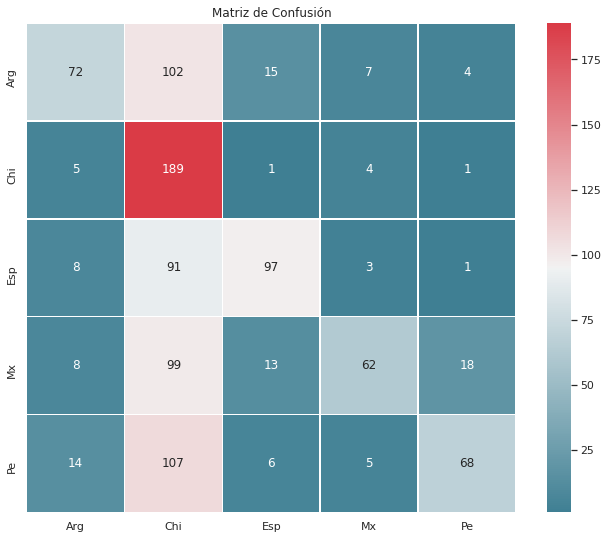

In [ ]:
# tu respuesta aquí
#librerias
import joblib
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report,  confusion_matrix
import numpy as np
import seaborn as sns

#bolsa de palabras
n_words = 20000
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes
tokenizer.fit_on_texts(CorpusTr_pros) 
BOW_test=tokenizer.texts_to_matrix(CorpusTe_pros, mode="count")
y_true=np.array(te_y)

#baseline y metricas
model_baseline = joblib.load(CurrentPath+'Tarea5_victor_gomez_SVM_bow.sav')
y_pred=model_baseline.predict(BOW_test)
print('Baseline')
print(classification_report(y_true, y_pred))
print()

# matriz de confusion
C = confusion_matrix(y_true, y_pred)
df_c=pd.DataFrame(C)
#df_c.columns=np.unique(y_true).tolist()
names=['Arg','Chi','Esp','Mx','Pe']
df_c.columns=names
df_c.index=names
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_c, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


### c) Implementa clasificadores basados en
- SVM con TF-IDF
- Redes convolucionales
- Redes LSTM o GRU

### Haz un breve reporte comparando los resultados, elige el mejor método y explica porqué. Especifica TODOS los parámetros que usaste en tus métodos (número de capas y unidades ocultas, longitud de secuencia, padding, regularización, etc). Usa una capa de embeddings con y sin transfer learning usando pesos pre-entrenados para español, verifica si los resultados son diferentes y elige cuál embedding prefieres y porqué. Para transfer learning, puedes usar `word2vec`, `gloVe` o `fastText`. Puedes buscar embeddings en español en los sitios oficiales de los métodos, o en éste sitio: https://github.com/dccuchile/spanish-word-embeddings.

# Respuesta:

- Para los modelos basados en redes convolucionales y recurrentes se utilizó el texto sin pre procesar y nuevamente con un vocabulario de 20000 palabras.

- Para las secuencias se utilizó la longitud máxima en los textos de entrenamiento (12051), esto porque se observó que el desempeñó de los modelos era sensible a la longitud de las secuencias y la métrica de validación, en este caso el accuray, mejoraba considerablemente si se aumentaba el tamaño. Se utilizó padding al inicio, es decir se agregaron 0s al inicio para que todas las secuencias tuvieran la misma longitud.

- Para los modelos de redes convolucionales se utilizó como base una capa de embeddings, con y sin Transfer Learning (word2vec) con tamaño longitud del vocabulario por la dimensión del embedding wor2vec (300) y a la salida de esta capa se agregó regularización dropout del 30%. Se observó que la regularización junto con el incremento en la longitud de las secuencias ayudó bastante a que mejorara el desempeño en el conjunto de prueba y evitar el sobre ajuste.

- Para el caso de redes recurrentes se agregó una capa LSTM con 300 unidades seguida de una capa de regularización dropout de 30%, seguida por una capa densa de 25 unidades con función de activación relu antes de la capa densa softmax. Para este tipo de redes se observó que ninguna de las arquitecturas con y sin transfer learning logró superar el baseline y mucho menos los resultados de los modelos a base de redes convolucionales.

- El número de parámetros para los modelos de redes recurrentes a entrenar sin transfer learning 6,728,855 es de  mientras que con transfer learning es de 728,855 lo cual es una enorme diferencia. 

- Para el caso de redes convolucionales se agregaron capas convolucionales una capa 1D con 32 filtros con kernels de tamaño 7  y función de activación relu, seguida de una capa de Max Pooling 1D global, seguida por otra capa de regularización dropout del 30% antes de la capa densa con softmax. Se observó que con transfer learning (word2vec) se requerían menos épocas para lograr el mismo desempeño que sin este y mejorarlo un poco sin causar sobre ajuste (Figura 1), además con Fine Tuning se logró mejorar nuevamente un poco mas el modelo sin causar sobre ajuste (Figura 2).

- El número de parámetros para los modelos de redes convolucionales a entrenar sin transfer learning 6,067,397 es de mientras que con transfer learning es de 67,397, lo cual es una enorme diferencia. 
 
- Se observó que, para arquitecturas más complejas tanto de redes convolucionales como recurrentes, se tenía un desempeño peor, ya que se causaba muy rápidamente un sobre ajuste en el conjunto de entrenamiento.

- Como las clases son balanceadas, el accuracy sirvió bien como metrica de comparación inicial, sin embargo, se eligió el mejor modelo según el recall macro avg, ya que este nos da una idea general de que tan buena fue la clasificación basado en las categorías reales. Observe la Figura 3 y note que el mejor modelo según este criterio fue el basado en redes convolucionales con Transfer Learning (CNN-TL).

- Para todos los modelos de redes recurrentes oconvolucionales se utilizó tamaño del minibatch de 32, early stopping, optimizador RMSprop con learning rate 1e-4.


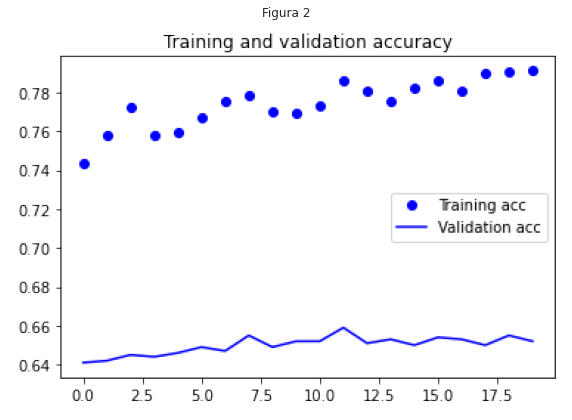

In [ ]:
#Figuras
f1=plt.imread(CurrentPath+'Tarea5_victor_gomez_CNN_TransfL.png')
f2=plt.imread(CurrentPath+'Tarea5_victor_gomez_CNN_TL_FT.png')
f3=plt.imread(CurrentPath+'Tarea5_victor_gomez_metrics.png')


def plotimg(x): 
    if x=='Figura 1':
        img=f1
    elif x=='Figura 2':
        img=f2
    elif x=='Figura 3':
        img=f3

        
    plt.figure(figsize=(10,10))
    plt.imshow(img) # display the image
    plt.title(x)
    plt.axis('off')
    plt.show()

interact(plotimg,x=['Figura 1', 'Figura 2', 'Figura 3'])

Código:

In [ ]:
#ubicacion de los datosoriginales
BlogsPath = '/content/drive/My Drive/Colab Notebooks/Tarea 5-20201123/hispablogs'

2250 files loaded from /content/drive/My Drive/Colab Notebooks/Tarea 5-20201123/hispablogs/hispablogs/train
1000 files loaded from /content/drive/My Drive/Colab Notebooks/Tarea 5-20201123/hispablogs/hispablogs/test


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 12051, 300)        70180200  
_________________________________________________________________
dropout_16 (Dropout)         (None, 12051, 300)        0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12045, 32)         67232     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 165       
Total params: 70,247,597
Trainable params: 70,247,597
Non-trainable params: 0
_________________________________________

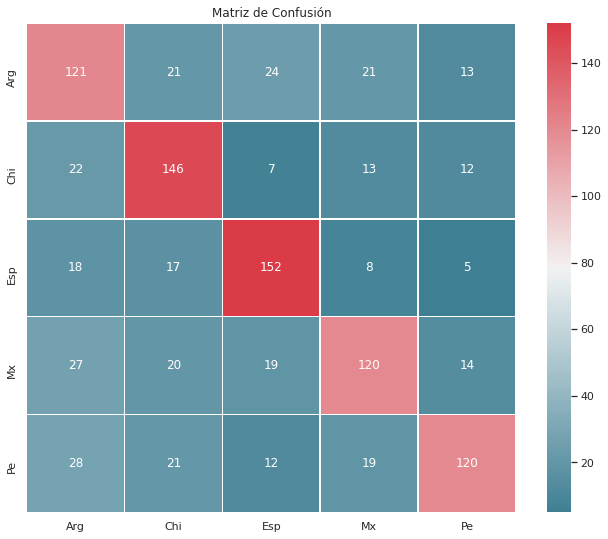

In [ ]:
#codigo
# librerias
import tensorflow as tf
import os
import re
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

#leer los datos de entrenamiento y prueba
def get_texts_from_dir(cat_dir):
    texts = []
    data_dir = cat_dir
    category_index = {}
    categories = []
    for category_name in sorted(os.listdir(data_dir)):
        category_id = len(category_index)
        category_index[category_name] = category_id
        category_path = os.path.join(data_dir, category_name)
        for f_name in sorted(os.listdir(category_path)):
            f_path = os.path.join(category_path, f_name)
            f = open(f_path, "r", encoding="utf8")
            texts += [f.read()]                
            f.close()
            categories += [category_id]
    print("%d files loaded from %s" % (len(texts), cat_dir))
    return texts, categories, category_index

# Load the RAW text and Category labels
tr_txt, tr_y, tr_y_ind = get_texts_from_dir(BlogsPath+"/hispablogs/train")
te_txt, te_y, te_y_ind = get_texts_from_dir(BlogsPath+"/hispablogs/test")

#prepara las secuencias
tokenizer=Tokenizer(nb_words=20000)
tokenizer.fit_on_texts(tr_txt)
sequencies=tokenizer.texts_to_sequences(te_txt)
X_test=pad_sequences(sequencies,maxlen=12051) #se tomó la maxima secuencia
y_test=np.array(te_y)


#mejor modelo y metricas
#carga el modelo
CNN_model = tf.keras.models.load_model(CurrentPath+'Tarea5_victor_gomez_CNN.h5') 
CNN_model.summary()
print()

y_pred=CNN_model.predict(X_test)

def maxin(xx): #selecciona la categoria con el mayor score
  maxi=xx==max(xx)
  maxs=np.sum(maxi)
  if maxs==1: a=xx.argmax()
  else: a=np.random.choice(np.where(xx==max(xx))[0])
  return(int(a))

y_pred2=np.zeros(y_test.shape)
for i in range(y_test.shape[0]):
  xx=y_pred[i,:]
  y_pred2[i]=maxin(xx)

y_true=y_test
y_pred=y_pred2
print('Best model: CNN')
print(classification_report(y_true, y_pred))
print()

# matriz de confusion
C = confusion_matrix(y_true, y_pred)
df_c=pd.DataFrame(C)
#df_c.columns=np.unique(y_true).tolist()
names=['Arg','Chi','Esp','Mx','Pe']
df_c.columns=names
df_c.index=names
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_c, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()



- Algo curioso a notar en la figura anterior, es que los países latinos fue donde se tuvo un menor desempeño comparado con España, excepto por chile que fue ligeramente similar.